In [55]:
import numpy as np
from time import time
from random import sample
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
def loadData(fileName):
    return np.loadtxt(fileName, dtype=float)

In [2]:
data = np.loadtxt("CS170_Small_Data__123.txt", dtype=float)

In [3]:
def nearestNeighbor(data,instance,features):
    restrictedData = data[:,features]
    restrictedInstance = instance[features]
    df = restrictedData[0]-restrictedInstance
    minDistance = np.dot(df,df)
    minIndex = 0
    for [index, row] in enumerate(restrictedData):
        if not np.array_equal(row, restrictedInstance):
            df = row-restrictedInstance
            distance = np.dot(df,df)
            if distance < minDistance:
                minDistance = distance
                minIndex = index
    return data[minIndex][0]

In [4]:
def leaveOneOut(data, features):
    correct = 0
    total = 0
    for row in data:
        total = total+1
        if row[0] == nearestNeighbor(data,row,features):
            correct = correct+1
    return correct/total

In [71]:
def forwardSelection(data):
    start = time()
    features = list(range(1,len(data[0])))
    usedFeatures = []
    accuracies = []
    while len(usedFeatures) < len(features):
        bestAccuracy = -1
        bestFeature = -1
        for feature in features:
            if feature not in usedFeatures:
                newFeatures = usedFeatures.copy()
                newFeatures.append(feature)
                accuracy = leaveOneOut(data,newFeatures)
                print(f"\tAccuracy using {newFeatures} was {accuracy:.2%}")
                if accuracy > bestAccuracy:
                    bestAccuracy = accuracy
                    bestFeature = feature
        usedFeatures.append(bestFeature)
        print(f"Best accuracy with {len(usedFeatures)} features ({usedFeatures}) was {bestAccuracy:.2%}")
        accuracies.append(bestAccuracy)
    print(f"Accuracies were {accuracies}")
    end = time()
    print(f"Execution took {int((end-start)*100)/100} seconds, {int((end-start)/60*100)/100} minutes, or {int((end-start)/3600*100)/100} hours")

In [72]:
def backwardSelection(data):
    start = time()
    usedFeatures = list(range(1,len(data[0])))
    print(f"Best accuracy with {len(usedFeatures)} features ({usedFeatures}) was {leaveOneOut(data,usedFeatures):.2%}")
    accuracies = []
    while len(usedFeatures) > 1:
        bestFeatures = []
        bestAccuracy = -1
        for feature in usedFeatures:
            newFeatures = usedFeatures.copy()
            newFeatures.remove(feature)
            accuracy = leaveOneOut(data,newFeatures)
            print(f"\tAccuracy using {newFeatures} was {accuracy:.2%}")
            if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestFeatures = newFeatures
        usedFeatures = bestFeatures
        print(f"Best accuracy with {len(usedFeatures)} features ({usedFeatures}) was {bestAccuracy:.2%}")
        accuracies.append(bestAccuracy)
    print(f"Accuracies were {accuracies}")
    end = time()
    print(f"Execution took {int((end-start)*100)/100} seconds, {int((end-start)/60*100)/100} minutes, or {int((end-start)/3600*100)/100} hours")

In [7]:
def randomRestartsBackwardSelection(data):
    potentialFeatures = list(range(1,len(data[0])))
    numRestarts = 10
    numStartingFeatures = 10
    overallBestAccuracy = -1
    overallBestFeatures = []
    for restart in range(10):
        featureSubset = sample(potentialFeatures,numStartingFeatures)
        print(f"Running restart {restart} of {numRestarts} with feature subset {featureSubset}")
        restartBestFeatures = []
        restartBestAccuracy = -1
        while len(featureSubset) > 1:
            bestFeatures = []
            bestAccuracy = -1
            for feature in featureSubset:
                newSubset = featureSubset.copy()
                newSubset.remove(feature)
                accuracy = leaveOneOut(data,newSubset)
                print(f"\tAccuracy using {newSubset} was {accuracy:.2%}")
                if accuracy > bestAccuracy:
                    bestAccuracy = accuracy
                    bestFeatures = newSubset
            featureSubset = bestFeatures
            print(f"Best accuracy with {len(featureSubset)} features ({featureSubset}) was {bestAccuracy:.2%}")
            if bestAccuracy > restartBestAccuracy:
                restartBestAccuracy = bestAccuracy
                restartBestFeatures = bestFeatures
        print(f"Best accuracy of restart {restart} was {restartBestAccuracy:.2%} with features {restartBestFeatures}")
        if restartBestAccuracy > overallBestAccuracy:
            overallBestAccuracy = restartBestAccuracy
            overallBestFeatures = restartBestFeatures
        
            

In [68]:
smallData = loadData("CS170_Small_Data__61.txt")
forwardSelection(smallData)
backwardSelection(smallData)

	Accuracy using [1] was 71.40%
	Accuracy using [2] was 65.60%
	Accuracy using [3] was 68.20%
	Accuracy using [4] was 83.00%
	Accuracy using [5] was 69.20%
	Accuracy using [6] was 73.00%
Best accuracy with 1 features ([4]) was 83.00%
	Accuracy using [4, 1] was 86.20%
	Accuracy using [4, 2] was 84.60%
	Accuracy using [4, 3] was 83.40%
	Accuracy using [4, 5] was 86.80%
	Accuracy using [4, 6] was 97.60%
Best accuracy with 2 features ([4, 6]) was 97.60%
	Accuracy using [4, 6, 1] was 92.40%
	Accuracy using [4, 6, 2] was 91.20%
	Accuracy using [4, 6, 3] was 93.80%
	Accuracy using [4, 6, 5] was 93.60%
Best accuracy with 3 features ([4, 6, 3]) was 93.80%
	Accuracy using [4, 6, 3, 1] was 90.60%
	Accuracy using [4, 6, 3, 2] was 88.00%
	Accuracy using [4, 6, 3, 5] was 88.20%
Best accuracy with 4 features ([4, 6, 3, 1]) was 90.60%
	Accuracy using [4, 6, 3, 1, 2] was 84.00%
	Accuracy using [4, 6, 3, 1, 5] was 83.40%
Best accuracy with 5 features ([4, 6, 3, 1, 2]) was 84.00%
	Accuracy using [4, 6, 3,

In [69]:
largeData = loadData("CS170_Large_Data__33.txt")
forwardSelection(largeData)
backwardSelection(largeData)

	Accuracy using [1] was 71.70%
	Accuracy using [2] was 68.70%
	Accuracy using [3] was 71.70%
	Accuracy using [4] was 71.10%
	Accuracy using [5] was 70.50%
	Accuracy using [6] was 70.00%
	Accuracy using [7] was 69.20%
	Accuracy using [8] was 68.30%
	Accuracy using [9] was 68.80%
	Accuracy using [10] was 68.00%
	Accuracy using [11] was 71.40%
	Accuracy using [12] was 70.70%
	Accuracy using [13] was 69.50%
	Accuracy using [14] was 70.20%
	Accuracy using [15] was 69.10%
	Accuracy using [16] was 68.40%
	Accuracy using [17] was 69.00%
	Accuracy using [18] was 68.10%
	Accuracy using [19] was 69.60%
	Accuracy using [20] was 68.80%
	Accuracy using [21] was 70.50%
	Accuracy using [22] was 83.50%
	Accuracy using [23] was 70.50%
	Accuracy using [24] was 70.20%
	Accuracy using [25] was 67.40%
	Accuracy using [26] was 65.40%
	Accuracy using [27] was 69.10%
	Accuracy using [28] was 69.50%
	Accuracy using [29] was 69.00%
	Accuracy using [30] was 69.20%
	Accuracy using [31] was 69.40%
	Accuracy using [

In [73]:
#Execution took 19.0 seconds, 0.32 minutes, or 0.01 hours
smallForwardSelectionAccuracies = [0.83, 0.976, 0.938, 0.906, 0.84, 0.812]
smallForwardSelectionNumFeatures = list(range(1,len(smallForwardSelectionAccuracies)+1))

#Execution took 18.99 seconds, 0.32 minutes, or 0.01 hours
smallBackwardSelectionAccuracies = [0.876, 0.918, 0.936, 0.976, 0.83]
smallBackwardSelectionNumFeatures = list(range(len(smallBackwardSelectionAccuracies),0,-1))

#Execution took 2988.38 seconds, 49.81 minutes, or 0.83 hours
largeForwardSelectionAccuracies = [0.835, 0.955, 0.946, 0.926, 0.899, 0.859, 0.842, 0.828, 0.81, 0.793, 0.775, 0.778, 0.772, 0.767, 0.759, 0.754, 0.747, 0.747, 0.742, 0.733, 0.734, 0.727, 0.73, 0.732, 0.724, 0.724, 0.731, 0.726, 0.717, 0.703, 0.705, 0.703, 0.71, 0.699, 0.693, 0.692, 0.688, 0.679, 0.684, 0.665]
largeForwardSelectionNumFeatures = list(range(1,len(largeForwardSelectionAccuracies)+1))

#Execution took 3167.73 seconds, 52.80 minutes, or 0.88 hours
largeBackwardSelectionAccuracies = [0.695, 0.7, 0.707, 0.709, 0.712, 0.719, 0.717, 0.723, 0.719, 0.72, 0.728, 0.727, 0.73, 0.729, 0.733, 0.731, 0.734, 0.735, 0.734, 0.74, 0.743, 0.737, 0.74, 0.739, 0.732, 0.738, 0.73, 0.728, 0.729, 0.724, 0.726, 0.724, 0.72, 0.715, 0.72, 0.741, 0.711, 0.713, 0.692]
largeBackwardSelectionNumFeatures = list(range(len(largeBackwardSelectionAccuracies),0,-1))

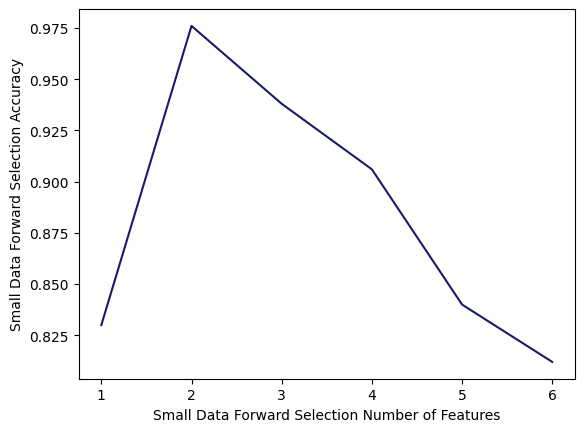

In [74]:
plt.clf()
plt.cla()
plt.plot(smallForwardSelectionNumFeatures, smallForwardSelectionAccuracies, color = "midnightblue")
plt.xlabel("Small Data Forward Selection Number of Features")
plt.ylabel("Small Data Forward Selection Accuracy")
plt.savefig("SmallDataForwardSelection.png")
plt.show()

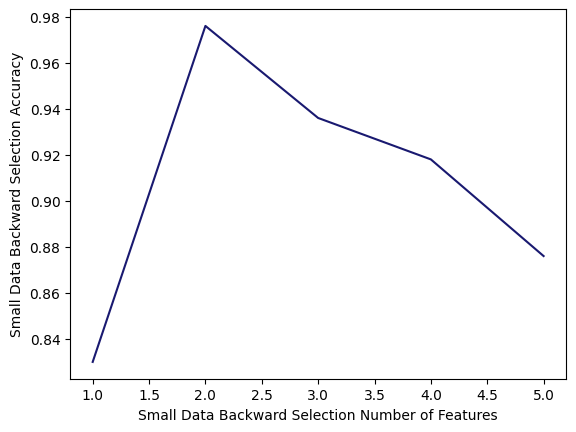

In [75]:
plt.clf()
plt.cla()
plt.plot(smallBackwardSelectionNumFeatures, smallBackwardSelectionAccuracies, color = "midnightblue")
plt.xlabel("Small Data Backward Selection Number of Features")
plt.ylabel("Small Data Backward Selection Accuracy")
plt.savefig("SmallDataBackwardSelection.png")
plt.show()

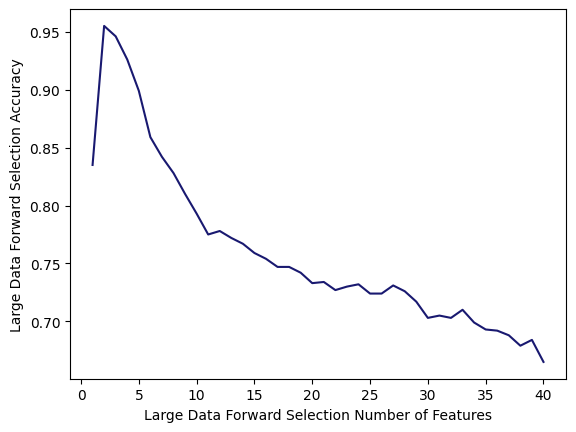

In [76]:
plt.clf()
plt.cla()
plt.plot(largeForwardSelectionNumFeatures,largeForwardSelectionAccuracies, color = "midnightblue")
plt.xlabel("Large Data Forward Selection Number of Features")
plt.ylabel("Large Data Forward Selection Accuracy")
plt.savefig("LargeDataForwardSelection.png")
plt.show()

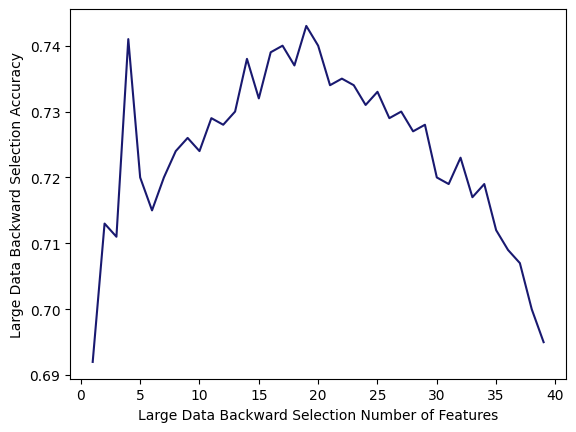

In [77]:
plt.clf()
plt.cla()
plt.plot(largeBackwardSelectionNumFeatures,largeBackwardSelectionAccuracies, color = "midnightblue")
plt.xlabel("Large Data Backward Selection Number of Features")
plt.ylabel("Large Data Backward Selection Accuracy")
plt.savefig("LargeDataBackwardSelection.png")
plt.show()